In [2]:
import numpy as np
import pandas as pd

In [3]:
URL="https://raw.githubusercontent.com/aviralb13/codes/main/datas/Health_insurance.csv"
data=pd.read_csv(URL)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 62.8+ KB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\tyagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

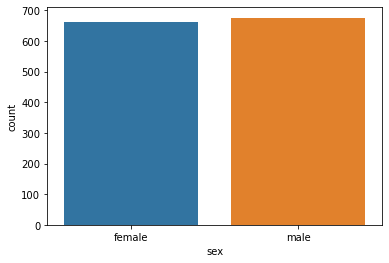

In [8]:
sns.countplot(data.sex)

C:\Users\tyagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

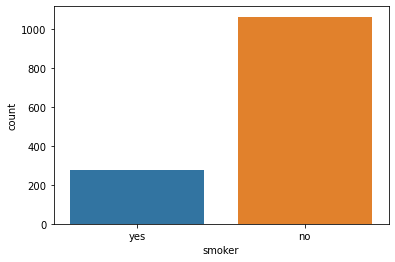

In [10]:
sns.countplot(data.smoker)

In [13]:
corr=data.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

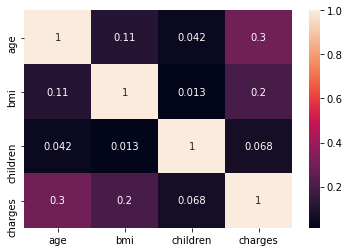

In [15]:
sns.heatmap(corr,annot=True)

In [24]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
data['sex']=label.fit_transform(data['sex'])
data['smoker']=label.fit_transform(data['smoker'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [26]:
features = ['age','sex','bmi','children' ,'smoker']
X = data[features]
y=data['charges']

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3)

In [30]:
regresser=RandomForestRegressor(random_state=42)

In [32]:
regresser.fit(train_x,train_y)

RandomForestRegressor(random_state=42)

In [33]:
prediction=regresser.predict(test_x)

In [34]:
regresser.predict([[19,0,27.900,0,1]])

array([17353.7613863])

In [35]:


from sklearn.metrics import mean_absolute_error
errors = (mean_absolute_error(test_y,prediction)) 

print(errors)



2632.291438347351
